<center> <h1>Neural Network</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creating a NeuralNetwork with back propagation

In [19]:
layers = [2,2,1]
alpha=0.5

In [20]:
W=[]

In [21]:
for i in range(len(layers)-2):
    w = np.random.randn(layers[i]+1,layers[i+1]+1)
    W.append(w/np.sqrt(layers[i]))

In [22]:
W

[array([[-0.16240142,  0.06748261,  0.54636039],
        [ 0.28295849,  0.62059673, -0.34512913],
        [-0.79251193,  0.71830689,  1.21234849]])]

In [23]:
w = np.random.randn(layers[-2]+1,layers[-1])
W.append(w/np.sqrt(layers[-2]))

In [28]:
np.random.randn(layers[-2]+1,layers[-1])

array([[ 0.55487131],
       [-0.53245134],
       [ 0.76459713]])

In [24]:
W

[array([[-0.16240142,  0.06748261,  0.54636039],
        [ 0.28295849,  0.62059673, -0.34512913],
        [-0.79251193,  0.71830689,  1.21234849]]),
 array([[ 0.57278884],
        [-0.34520623],
        [ 0.85653741]])]

In [2]:
class NeuralNetwork:
  def __init__(self,layers,alpha=0.1):
    self.W=[]
    self.layers = layers
    self.alpha = alpha
    self.losses = {}
    for i in np.arange(0,len(layers)-2):
      w = np.random.randn(layers[i]+1,layers[i+1]+1)
      self.W.append(w/np.sqrt(layers[i]))
    w = np.random.randn(layers[-2]+1,layers[-1])
    self.W.append(w/np.sqrt(layers[-2]))
  def __repr__(self):
    return "NeuralNetWork : "+"-".join([str(i) for i in self.layers])

  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))

  def sigmoid_deriv(self,x):
    return x*(1-x)

  def fit(self,X,y,epochs=1000,displayUpdate=100):
    X = np.c_[X,np.ones((X.shape[0]))]
    for epoch in np.arange(0,epochs):
      for x,target in zip(X,y):
        self.fit_partial(x,target)
      if epoch==0 or (epoch+1)%displayUpdate ==0:
        loss = self.calculate_loss(X,y)
        self.losses[epoch+1] = loss
        #print("[INFO] epoch={}, loss={:.6f}".format(epoch + 1, loss))

  def fit_partial(self,x,y):
    A = [np.atleast_2d(x)]
    for layer in np.arange(0,len(self.W)):
      net = A[layer].dot(self.W[layer])
      out = self.sigmoid(net)
      A.append(out)
    error = A[-1]-y
    D =[error* self.sigmoid_deriv(A[-1])]
    for layer in np.arange(len(A)-2,0,-1):
      delta = D[-1].dot(self.W[layer].T)
      delta = delta * self.sigmoid_deriv(A[layer])
      D.append(delta)
    D = D[::-1]
    for layer in range(0,len(self.W)):
      self.W[layer]+= -self.alpha*A[layer].T.dot(D[layer])
  def predict(self,X,addBias=True):
    p = np.atleast_2d(X)
    if addBias:
      p = np.c_[p, np.ones((p.shape[0]))]

    for layer in np.arange(0, len(self.W)):
      p = self.sigmoid(np.dot(p, self.W[layer]))
    return p
  def calculate_loss(self,X,targets):
    targets = np.atleast_2d(targets)
    predictions = self.predict(X, addBias=False)
    loss = 0.5 * np.sum((predictions - targets) ** 2)
    return loss


In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [4]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
y

array([[0],
       [1],
       [1],
       [0]])

In [9]:
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000)

### Chnage in loss with epochs 

Text(0.5, 1.0, 'epochs vs Loss')

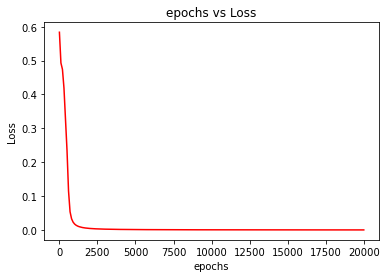

In [10]:
plt.plot(list(nn.losses.keys()),list(nn.losses.values()),'r-')

plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("epochs vs Loss")

In [11]:
for (x, target) in zip(X, y):
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0095, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9867, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9898, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0118, step=0


# MNIST Data set

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [13]:
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64


In [14]:
(trainX, testX, trainY, testY) = train_test_split(data,digits.target, test_size=0.25)
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [15]:
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] training network...
[INFO] NeuralNetWork : 64-32-16-10


In [16]:
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.89      1.00      0.94        34
           2       1.00      1.00      1.00        43
           3       0.96      0.98      0.97        44
           4       1.00      0.98      0.99        54
           5       1.00      0.94      0.97        49
           6       0.97      1.00      0.99        38
           7       1.00      0.96      0.98        53
           8       0.90      0.91      0.91        47
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Text(0, 0.5, 'Loss')

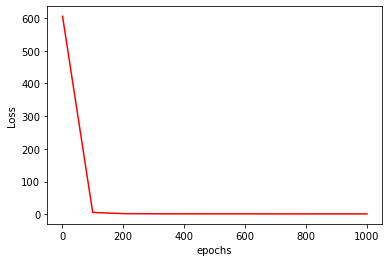

In [17]:
plt.plot(list(nn.losses.keys()),list(nn.losses.values()),'r-')
plt.xlabel("epochs")
plt.ylabel("Loss")